<a href="https://colab.research.google.com/github/FathimaNazarudeen/lung-cancer/blob/main/lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv("/content/thirddatasetdata3lung1editednew.csv")

In [3]:
data['Label'].value_counts()

'squamous cell carcinoma'    83
'large cell'                 71
others                       70
adenocarcinoma               23
Name: Label, dtype: int64

In [4]:
data.columns 

Index(['original_shape_Elongation', 'original_shape_Flatness',
       'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum2DDiameterRow',
       'original_shape_Maximum2DDiameterSlice',
       'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume',
       'original_shape_MinorAxisLength',
       ...
       'wavelet-LLL_gldm_LowGrayLevelEmphasis',
       'wavelet-LLL_gldm_SmallDependenceEmphasis',
       'wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis',
       'wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis',
       'wavelet-LLL_ngtdm_Busyness', 'wavelet-LLL_ngtdm_Coarseness',
       'wavelet-LLL_ngtdm_Complexity', 'wavelet-LLL_ngtdm_Contrast',
       'wavelet-LLL_ngtdm_Strength', 'Label'],
      dtype='object', length=1094)

In [5]:
data_real = data.replace(np.inf, np.nan)

In [6]:
data_real.isnull().sum().sum()

0

In [7]:
data_df = data_real.dropna(axis=0)

In [8]:
data_df.isnull().sum().sum()

0

In [9]:
data_df

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,wavelet-LLL_gldm_LowGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceEmphasis,wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength,Label
0,0.898535,0.570600,31.886509,55.882450,63.529521,66.573268,61.188234,72.718636,48863.000000,50.212354,...,0.000175,0.782714,188544.34720,0.000174,0.001121,0.001950,5.241414e+06,1.329551,576.487136,'large cell'
1,0.356341,0.293696,30.746972,104.689637,62.289646,76.837491,48.332184,99.015150,16849.666670,37.305177,...,0.000480,0.809799,185506.13380,0.000478,0.000573,0.006157,3.263341e+06,8.577655,1468.964920,'large cell'
2,0.972992,0.838632,36.685554,43.744513,56.920998,59.093147,50.000000,59.531504,45073.000000,42.563080,...,0.000204,0.607683,51789.09974,0.000200,0.003829,0.001594,1.033373e+06,1.189275,158.997655,'large cell'
3,0.355514,0.250921,32.048424,127.723174,92.130342,52.153619,50.159745,158.808060,13973.333330,45.407417,...,0.000609,0.672628,16150.60173,0.000595,0.008233,0.005954,6.759171e+04,0.596882,48.462226,'large cell'
4,0.869980,0.715864,37.872296,52.904327,63.780875,65.115282,59.363288,70.992957,50277.333330,46.025717,...,0.000179,0.739990,152246.78220,0.000178,0.001932,0.001420,3.371136e+06,2.314521,364.513624,'large cell'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,0.613950,0.536166,67.085543,125.120921,151.433154,143.178211,118.962179,186.986630,262922.000000,76.818007,...,0.000055,0.539262,30796.75751,0.000047,0.018433,0.000387,5.073418e+05,0.115637,33.076902,others
243,0.706267,0.473298,19.144342,40.448808,39.395431,48.414874,34.234486,49.071377,13417.666670,28.567655,...,0.000797,0.635981,11131.16552,0.000775,0.007429,0.006453,8.507560e+04,0.600453,51.726423,others
244,0.832425,0.624674,10.141866,16.235443,19.697716,17.204651,16.124516,19.798990,1428.000000,13.514788,...,0.005545,0.855006,21236.68132,0.005537,0.003682,0.030105,8.491850e+04,4.490970,194.650316,others
245,0.505327,0.335579,14.737564,43.916805,45.650849,41.761226,29.120440,50.358713,7421.333333,22.192352,...,0.001130,0.715150,10757.09395,0.001110,0.007144,0.010583,5.701539e+04,0.849220,56.233061,others


In [10]:
data_X = data_df.drop(['Label'], axis = 1)

In [11]:
data_X.columns 

Index(['original_shape_Elongation', 'original_shape_Flatness',
       'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum2DDiameterRow',
       'original_shape_Maximum2DDiameterSlice',
       'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume',
       'original_shape_MinorAxisLength',
       ...
       'wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis',
       'wavelet-LLL_gldm_LowGrayLevelEmphasis',
       'wavelet-LLL_gldm_SmallDependenceEmphasis',
       'wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis',
       'wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis',
       'wavelet-LLL_ngtdm_Busyness', 'wavelet-LLL_ngtdm_Coarseness',
       'wavelet-LLL_ngtdm_Complexity', 'wavelet-LLL_ngtdm_Contrast',
       'wavelet-LLL_ngtdm_Strength'],
      dtype='object', length=1093)

In [12]:
data_X.shape 

(247, 1093)

In [13]:
data_y = data_df['Label']

In [14]:
data_y.shape 

(247,)

In [15]:
data_df.isnull().sum().sum()

0

In [16]:
data_y.unique()

array(["'large cell'", "'squamous cell carcinoma'", 'adenocarcinoma',
       'others'], dtype=object)

In [17]:
data_X 

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet-LLL_gldm_LowGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceEmphasis,wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength
0,0.898535,0.570600,31.886509,55.882450,63.529521,66.573268,61.188234,72.718636,48863.000000,50.212354,...,0.000182,0.000175,0.782714,188544.34720,0.000174,0.001121,0.001950,5.241414e+06,1.329551,576.487136
1,0.356341,0.293696,30.746972,104.689637,62.289646,76.837491,48.332184,99.015150,16849.666670,37.305177,...,0.000492,0.000480,0.809799,185506.13380,0.000478,0.000573,0.006157,3.263341e+06,8.577655,1468.964920
2,0.972992,0.838632,36.685554,43.744513,56.920998,59.093147,50.000000,59.531504,45073.000000,42.563080,...,0.000242,0.000204,0.607683,51789.09974,0.000200,0.003829,0.001594,1.033373e+06,1.189275,158.997655
3,0.355514,0.250921,32.048424,127.723174,92.130342,52.153619,50.159745,158.808060,13973.333330,45.407417,...,0.000702,0.000609,0.672628,16150.60173,0.000595,0.008233,0.005954,6.759171e+04,0.596882,48.462226
4,0.869980,0.715864,37.872296,52.904327,63.780875,65.115282,59.363288,70.992957,50277.333330,46.025717,...,0.000188,0.000179,0.739990,152246.78220,0.000178,0.001932,0.001420,3.371136e+06,2.314521,364.513624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,0.613950,0.536166,67.085543,125.120921,151.433154,143.178211,118.962179,186.986630,262922.000000,76.818007,...,0.000135,0.000055,0.539262,30796.75751,0.000047,0.018433,0.000387,5.073418e+05,0.115637,33.076902
243,0.706267,0.473298,19.144342,40.448808,39.395431,48.414874,34.234486,49.071377,13417.666670,28.567655,...,0.000960,0.000797,0.635981,11131.16552,0.000775,0.007429,0.006453,8.507560e+04,0.600453,51.726423
244,0.832425,0.624674,10.141866,16.235443,19.697716,17.204651,16.124516,19.798990,1428.000000,13.514788,...,0.005574,0.005545,0.855006,21236.68132,0.005537,0.003682,0.030105,8.491850e+04,4.490970,194.650316
245,0.505327,0.335579,14.737564,43.916805,45.650849,41.761226,29.120440,50.358713,7421.333333,22.192352,...,0.001249,0.001130,0.715150,10757.09395,0.001110,0.007144,0.010583,5.701539e+04,0.849220,56.233061


Label encoding

In [18]:
from sklearn.preprocessing import LabelEncoder 

In [19]:
le = LabelEncoder()

In [20]:
data_y_trans = le.fit_transform(data_y)


In [21]:
data_X

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet-LLL_gldm_LowGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceEmphasis,wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength
0,0.898535,0.570600,31.886509,55.882450,63.529521,66.573268,61.188234,72.718636,48863.000000,50.212354,...,0.000182,0.000175,0.782714,188544.34720,0.000174,0.001121,0.001950,5.241414e+06,1.329551,576.487136
1,0.356341,0.293696,30.746972,104.689637,62.289646,76.837491,48.332184,99.015150,16849.666670,37.305177,...,0.000492,0.000480,0.809799,185506.13380,0.000478,0.000573,0.006157,3.263341e+06,8.577655,1468.964920
2,0.972992,0.838632,36.685554,43.744513,56.920998,59.093147,50.000000,59.531504,45073.000000,42.563080,...,0.000242,0.000204,0.607683,51789.09974,0.000200,0.003829,0.001594,1.033373e+06,1.189275,158.997655
3,0.355514,0.250921,32.048424,127.723174,92.130342,52.153619,50.159745,158.808060,13973.333330,45.407417,...,0.000702,0.000609,0.672628,16150.60173,0.000595,0.008233,0.005954,6.759171e+04,0.596882,48.462226
4,0.869980,0.715864,37.872296,52.904327,63.780875,65.115282,59.363288,70.992957,50277.333330,46.025717,...,0.000188,0.000179,0.739990,152246.78220,0.000178,0.001932,0.001420,3.371136e+06,2.314521,364.513624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,0.613950,0.536166,67.085543,125.120921,151.433154,143.178211,118.962179,186.986630,262922.000000,76.818007,...,0.000135,0.000055,0.539262,30796.75751,0.000047,0.018433,0.000387,5.073418e+05,0.115637,33.076902
243,0.706267,0.473298,19.144342,40.448808,39.395431,48.414874,34.234486,49.071377,13417.666670,28.567655,...,0.000960,0.000797,0.635981,11131.16552,0.000775,0.007429,0.006453,8.507560e+04,0.600453,51.726423
244,0.832425,0.624674,10.141866,16.235443,19.697716,17.204651,16.124516,19.798990,1428.000000,13.514788,...,0.005574,0.005545,0.855006,21236.68132,0.005537,0.003682,0.030105,8.491850e+04,4.490970,194.650316
245,0.505327,0.335579,14.737564,43.916805,45.650849,41.761226,29.120440,50.358713,7421.333333,22.192352,...,0.001249,0.001130,0.715150,10757.09395,0.001110,0.007144,0.010583,5.701539e+04,0.849220,56.233061


In [22]:
df2 = pd.DataFrame(data_X)  

In [23]:
df2.to_csv(r'my_data.csv', index=False)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(data_X, data_y_trans, train_size = 0.7)

In [25]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

LASSO FEATURE SELECTION

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [63]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [64]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [65]:
search.fit(data_X, data_y_trans)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-2.076 total time=   0.3s
[CV 2/5] END .................model__alpha=0.1;, score=-1.039 total time=   0.2s
[CV 3/5] END .................model__alpha=0.1;, score=-0.180 total time=   0.3s
[CV 4/5] END .................model__alpha=0.1;, score=-1.179 total time=   0.2s
[CV 5/5] END .................model__alpha=0.1;, score=-3.201 total time=   0.4s
[CV 1/5] END .................model__alpha=0.2;, score=-2.659 total time=   0.1s
[CV 2/5] END .................model__alpha=0.2;, score=-1.083 total time=   0.1s
[CV 3/5] END .................model__alpha=0.2;, score=-0.153 total time=   0.2s
[CV 4/5] END .................model__alpha=0.2;, score=-1.520 total time=   0.2s
[CV 5/5] END .................model__alpha=0.2;, score=-3.904 total time=   0.1s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-2.927 total time=   0.0s
[CV 2/5] END .model__alpha=0.30000000000000004;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [66]:
search.best_params_
# {'model__alpha': 1.2000000000000002}

{'model__alpha': 0.1}

In [67]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [68]:
importance = np.abs(coefficients)

In [69]:
features = data_X.columns

In [70]:
np.array(features)[importance > 0]

array(['original_shape_Sphericity', 'original_firstorder_Maximum',
       'log-sigma-1-0-mm-3D_firstorder_Skewness',
       'wavelet-LLH_glcm_Correlation',
       'wavelet-LLH_glszm_GrayLevelNonUniformity',
       'wavelet-LHL_firstorder_Maximum', 'wavelet-LHH_firstorder_Median',
       'wavelet-HLL_glcm_Correlation', 'wavelet-HLH_firstorder_Skewness',
       'wavelet-HHH_firstorder_Mean', 'wavelet-HHH_firstorder_Median',
       'wavelet-LLL_firstorder_Uniformity',
       'wavelet-LLL_glcm_MaximumProbability',
       'wavelet-LLL_glszm_GrayLevelNonUniformity',
       'wavelet-LLL_glszm_LargeAreaHighGrayLevelEmphasis'], dtype=object)

In [71]:
data_new_20features_X = data_X[['original_shape_Sphericity', 
'original_firstorder_Maximum',
'log-sigma-1-0-mm-3D_firstorder_Skewness',
'wavelet-LLH_glcm_Correlation',
'wavelet-LLH_glszm_GrayLevelNonUniformity',
'wavelet-LHL_firstorder_Maximum', 'wavelet-LHH_firstorder_Median',
'wavelet-HLL_glcm_Correlation', 'wavelet-HLH_firstorder_Skewness',
'wavelet-HHH_firstorder_Mean', 'wavelet-HHH_firstorder_Median',
'wavelet-LLL_firstorder_Uniformity',
'wavelet-LLL_glcm_MaximumProbability',
'wavelet-LLL_glszm_GrayLevelNonUniformity',
'wavelet-LLL_glszm_LargeAreaHighGrayLevelEmphasis']]

In [72]:
from sklearn.model_selection import train_test_split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(data_new_20features_X, data_y_trans, train_size = 0.8, random_state=26)

In [73]:
from sklearn.preprocessing import StandardScaler 
ss_20 = StandardScaler()
X_train_std_20 = ss_20.fit_transform(X_train_20)
X_test_std_20 = ss_20.fit_transform(X_test_20)

Random forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=56)
rf.fit(data_new_20features_X, data_y_trans)

RandomForestClassifier(random_state=56)

In [75]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(rf, data_new_20features_X, data_y_trans, cv=10)
conf_mat = confusion_matrix(data_y_trans, y_pred)

In [76]:
print(conf_mat)

[[60  8  0  3]
 [ 3 74  0  6]
 [ 3  0 20  0]
 [ 3  2  0 65]]


In [77]:
print("Classification Report for Random Forest: \n", classification_report(data_y_trans,y_pred))

Classification Report for Random Forest: 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86        71
           1       0.88      0.89      0.89        83
           2       1.00      0.87      0.93        23
           3       0.88      0.93      0.90        70

    accuracy                           0.89       247
   macro avg       0.91      0.88      0.89       247
weighted avg       0.89      0.89      0.89       247



In [78]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [79]:
from sklearn.preprocessing import label_binarize
y_bin = label_binarize(data_y_trans, classes=[0, 1, 2,3])
from itertools import cycle
lw=2

In [80]:
import matplotlib.pyplot as plt

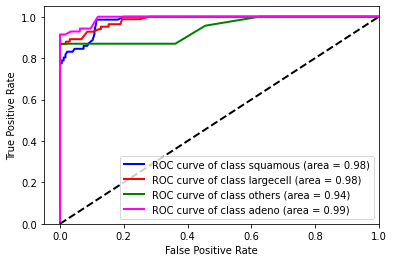

In [93]:
y_score = cross_val_predict(rf, data_new_20features_X, data_y_trans, cv=10 ,method='predict_proba')

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','magenta'])
list_class = ['squamous','largecell','others','adeno']
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(list_class[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

svm

In [103]:
from sklearn.svm import SVC

svm_rbf = SVC(gamma=4, C=1, probability=True)

In [104]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(svm_rbf, data_new_20features_X, data_y_trans, cv=10)
conf_mat = confusion_matrix(data_y_trans, y_pred)

In [105]:
print("Classification Report for SVM: \n", classification_report(data_y_trans,y_pred))

Classification Report for SVM: 
               precision    recall  f1-score   support

           0       0.84      0.80      0.82        71
           1       0.75      0.90      0.82        83
           2       1.00      0.87      0.93        23
           3       1.00      0.84      0.91        70

    accuracy                           0.85       247
   macro avg       0.90      0.85      0.87       247
weighted avg       0.87      0.85      0.86       247



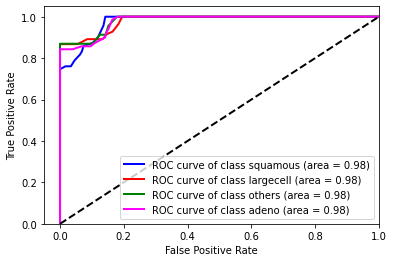

In [106]:
y_score = cross_val_predict(svm_rbf, data_new_20features_X, data_y_trans, cv=10 ,method='predict_proba')

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','magenta'])
list_class = ['squamous','largecell','others','adeno']
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(list_class[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

knn

In [107]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3) 

In [108]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(knn, data_new_20features_X, data_y_trans, cv=10)
conf_mat = confusion_matrix(data_y_trans, y_pred)

In [109]:
print("Classification Report for KNN: \n", classification_report(data_y_trans,y_pred))

Classification Report for KNN: 
               precision    recall  f1-score   support

           0       0.73      0.68      0.70        71
           1       0.72      0.82      0.76        83
           2       0.61      0.61      0.61        23
           3       0.78      0.70      0.74        70

    accuracy                           0.72       247
   macro avg       0.71      0.70      0.70       247
weighted avg       0.73      0.72      0.72       247



ROC Curve

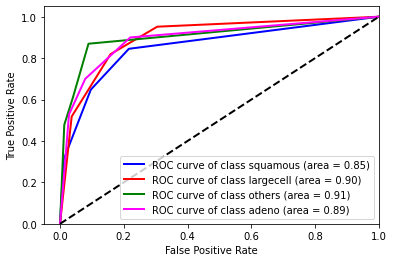

In [110]:
y_score = cross_val_predict(knn, data_new_20features_X, data_y_trans, cv=10 ,method='predict_proba')

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','magenta'])
list_class = ['squamous','largecell','others','adeno']
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(list_class[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

Gradient boostclassifier

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
gradient_boost = GradientBoostingClassifier(random_state=56)

In [59]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(gradient_boost, data_new_20features_X, data_y_trans, cv=10)
conf_mat = confusion_matrix(data_y_trans, y_pred)

In [112]:
print("Classification Report for Gradient boost: \n", classification_report(data_y_trans,y_pred))

Classification Report for Gradient boost: 
               precision    recall  f1-score   support

           0       0.73      0.68      0.70        71
           1       0.72      0.82      0.76        83
           2       0.61      0.61      0.61        23
           3       0.78      0.70      0.74        70

    accuracy                           0.72       247
   macro avg       0.71      0.70      0.70       247
weighted avg       0.73      0.72      0.72       247



ROC

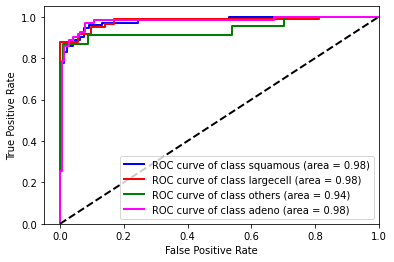

In [111]:
y_score = cross_val_predict(gradient_boost, data_new_20features_X, data_y_trans, cv=10 ,method='predict_proba')

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','magenta'])
list_class = ['squamous','largecell','others','adeno']
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(list_class[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()